In [1]:
import torch

In [2]:
!ls

bboxGen  exploredata.ipynb  __pycache__  rawdata  Untitled.ipynb  utils.py


In [4]:
from bboxGen.bboxExtract import bbox_model

In [5]:
model = bbox_model()

In [6]:
model.load_state_dict(torch.load('bboxGen/logs/model-76.pth'))

In [7]:
model.eval()

bbox_model(
  (body): Sequential(
    (0): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
    (6): ReLU()
    (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
    (13): ReLU()
    (14): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU()
    (18): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [8]:
with open('bboxGen/cropping.txt', 'rt') as f:
    df = f.read().split('\n')[:-1]
    df = [line.split(',') for line in df]
    coords = []
    for p, *coord in df:
        coords.append((p, [(int(coord[i]), int(coord[i+1]))
                           for i in range(0, len(coord), 2)]))

In [9]:
import numpy

In [10]:
numpy.random.seed(42)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
trn_fnms, val_fnms = train_test_split(coords, test_size=200)

In [13]:
val_fnms[0]

('0444f67e.jpg',
 [(104, 239), (150, 143), (942, 208), (956, 242), (677, 439), (264, 432)])

In [19]:
from bboxGen.datagen import readimage_resize, bounding_rectangle

In [20]:
STD = 0.225
AVG = 0.757
LENGTH = 384

In [31]:
img, (s_w, s_h) = readimage_resize('rawdata/bboxes/'+'0444f67e.jpg', LENGTH)

In [32]:
import skimage.io as io

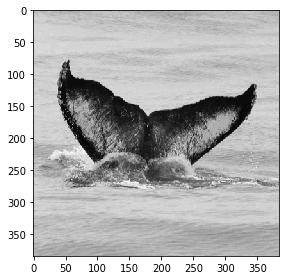

In [33]:
io.imshow(img)

In [37]:
import numpy as np

In [38]:
img.shape

(384, 384)

In [39]:
img.dtype

dtype('float64')

In [40]:
img = img.astype(np.float32)

In [41]:
img.dtype

dtype('float32')

In [42]:
img = torch.from_numpy(img)

In [43]:
img = img.unsqueeze(0)

In [44]:
img.shape

torch.Size([1, 384, 384])

In [45]:
img = img.unsqueeze(0)

In [46]:
img.shape

torch.Size([1, 1, 384, 384])

In [47]:
img.dtype

torch.float32

In [48]:
# setting device on GPU if available, else CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [49]:
model.to(device)

bbox_model(
  (body): Sequential(
    (0): Conv2d(1, 64, kernel_size=(9, 9), stride=(1, 1), padding=(4, 4))
    (1): ReLU()
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
    (6): ReLU()
    (7): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): Conv2d(64, 64, kernel_size=(2, 2), stride=(2, 2))
    (13): ReLU()
    (14): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU()
    (16): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (17): ReLU()
    (18): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [50]:
model.eval()
with torch.no_grad():
    out = model(img.to(device))

In [51]:
out

tensor([[ 70.3539, 138.4309, 339.4773, 220.8853]], device='cuda:0')

In [52]:
out = out.cpu().numpy()

In [53]:
out

array([[ 70.35387, 138.43092, 339.47733, 220.88535]], dtype=float32)

In [54]:
scale = np.array([s_w, s_h, s_w, s_h])
scale

array([0.36571429, 0.54857143, 0.36571429, 0.54857143])

In [55]:
preds = out / scale
preds

array([[192.37385392, 252.34803756, 928.25831175, 402.65557766]])

In [56]:
preds = preds.astype(np.int)

In [63]:
coord = [(x*s_w, y*s_h) for x, y in val_fnms[0][1]]

In [64]:
coord = bounding_rectangle(coord, LENGTH)
coord

(38.034285714285716, 78.44571428571429, 349.62285714285713, 240.82285714285715)

In [59]:
preds

array([[192, 252, 928, 402]])

In [60]:
img = io.imread('rawdata/bboxes/'+'0444f67e.jpg')
img.shape

(700, 1050, 3)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('rawdata/train.csv')

In [3]:
df.head()

,Image,Id
0,0000e88ab.jpg,w_f48451c
1,0001f9222.jpg,w_c3d896a
2,00029d126.jpg,w_20df2c5
3,00050a15a.jpg,new_whale
4,0005c1ef8.jpg,new_whale


In [11]:
df.groupby('Id').size()[df.groupby('Id').size()>1].index.tolist()

['new_whale',
 'w_0027efa',
 'w_00289b1',
 'w_003bae6',
 'w_00656c0',
 'w_007fefa',
 'w_00904a7',
 'w_009c9c5',
 'w_00d50c9',
 'w_00f340d',
 'w_010f858',
 'w_0118bab',
 'w_012678c',
 'w_0135f5f',
 'w_0182687',
 'w_0189b6d',
 'w_01cb0c4',
 'w_01cbbbd',
 'w_01f14e1',
 'w_022b708',
 'w_022d2f5',
 'w_02469a1',
 'w_02545ea',
 'w_025911c',
 'w_0277a07',
 'w_0292e15',
 'w_02aa597',
 'w_02c7e9d',
 'w_02d138d',
 'w_02ff6d6',
 'w_030ac9b',
 'w_030c8b0',
 'w_030e2cf',
 'w_031e1a3',
 'w_0323574',
 'w_03270e3',
 'w_0350bf4',
 'w_03670aa',
 'w_0369a5c',
 'w_036bc54',
 'w_038dfc0',
 'w_03ad89c',
 'w_03e3e5e',
 'w_04003e9',
 'w_042b547',
 'w_04713fd',
 'w_049ae2e',
 'w_04acf95',
 'w_04c9b23',
 'w_04d4568',
 'w_04de239',
 'w_04ebfe8',
 'w_04f5a19',
 'w_04f5f55',
 'w_05081a8',
 'w_0513962',
 'w_0531ad5',
 'w_0532483',
 'w_054162a',
 'w_0577ccc',
 'w_059d9e0',
 'w_05b4b0c',
 'w_05bf34e',
 'w_05cc23c',
 'w_05d65b9',
 'w_0630c3e',
 'w_0637181',
 'w_06376db',
 'w_06460d7',
 'w_06471d5',
 'w_0655608',
 'w_06

In [12]:
len(df.groupby('Id').size()[df.groupby('Id').size()>1].index.tolist())

2932

In [15]:
for _, row in df.iterrows():
    print(row['Image'], row['Id'])

0000e88ab.jpg w_f48451c
0001f9222.jpg w_c3d896a
00029d126.jpg w_20df2c5
00050a15a.jpg new_whale
0005c1ef8.jpg new_whale
0006e997e.jpg new_whale
000a6daec.jpg w_dd88965
000f0f2bf.jpg new_whale
0016b897a.jpg w_64404ac
001c1ac5f.jpg w_a6f9d33
001cae55b.jpg w_581ba42
001d7450c.jpg new_whale
00200e115.jpg new_whale
00245a598.jpg new_whale
002b4615d.jpg new_whale
002f99f01.jpg new_whale
00355ff28.jpg w_cb622a2
00357e37a.jpg w_d3b46e7
003795857.jpg new_whale
0041880bf.jpg new_whale
0043da555.jpg new_whale
00442c882.jpg w_8cad422
00464ff65.jpg new_whale
004775679.jpg w_13ae3d4
004ae9e26.jpg new_whale
004c0f43b.jpg new_whale
004e8ad5b.jpg w_3de579a
004f87702.jpg w_1d0830e
0050ef29d.jpg w_2ba6978
00514c876.jpg w_8dddbee
0052ce2f5.jpg w_2365d55
00537ec91.jpg w_3879fa0
00570db6b.jpg w_9c506f6
005ce3100.jpg new_whale
00600ce17.jpg new_whale
006017ddf.jpg w_8a6a8d5
0060f764a.jpg w_662530e
006500b3d.jpg w_a8b34a0
006506edf.jpg new_whale
0067b3a20.jpg w_c0d11da
006bdc6ff.jpg new_whale
00713060e.jpg w_

0ab985064.jpg new_whale
0aba2f75b.jpg w_1554173
0aba5715c.jpg w_27597ff
0aba6a118.jpg new_whale
0ac3e6b5e.jpg new_whale
0ac497ad5.jpg w_11d8c70
0ac53385b.jpg w_e2a09d4
0ac67f496.jpg w_de03861
0ac7c6cf0.jpg new_whale
0acbf516e.jpg w_a283c8c
0acbfcb58.jpg w_1a96d7b
0acd8f27b.jpg new_whale
0ace27aff.jpg new_whale
0acef76f0.jpg w_bf960fa
0acfd79ff.jpg w_32eaf54
0ad26de1e.jpg new_whale
0ad49e75b.jpg new_whale
0ad6ea37e.jpg w_8cad422
0ada1400a.jpg w_d829778
0adaaefda.jpg w_d066c0a
0adb22932.jpg new_whale
0add2d6bd.jpg new_whale
0aded8e9e.jpg w_98e83cc
0ae6d74ca.jpg w_e21b629
0ae95cf70.jpg w_9b5109b
0aec375db.jpg w_412b5ad
0aef34cec.jpg w_b70c09f
0af034423.jpg w_343f088
0af13a9b1.jpg new_whale
0af1795aa.jpg w_8ae65ef
0af1d57ba.jpg new_whale
0af805558.jpg w_f48451c
0afc56747.jpg w_19f507e
0afe8c93a.jpg new_whale
0afeef5a3.jpg w_47996c6
0aff93538.jpg new_whale
0afff2aa7.jpg w_16dfac7
0b00b3f0f.jpg new_whale
0b033e16b.jpg new_whale
0b05062cd.jpg new_whale
0b0555f44.jpg w_9a91c1e
0b0589067.jpg w_

174936982.jpg w_5bf792a
1749cf8d7.jpg w_581ba42
174b35e73.jpg w_30f2f0f
1750c5e26.jpg w_a32ff7f
175374a41.jpg w_fd3e556
17571fa61.jpg new_whale
175bfb3b8.jpg w_90c9763
176221f60.jpg w_f2e561e
1768ada48.jpg new_whale
17695d223.jpg w_8da30ad
176fcdc3b.jpg w_df6efd0
1770e38df.jpg w_cd645e4
177c39e7a.jpg w_1920193
17802eaa3.jpg new_whale
17821bbd2.jpg w_12fdac7
17831d0f0.jpg w_f0663e5
178337123.jpg w_c058057
1783ad1c3.jpg w_17b0d3a
178fe9885.jpg w_298f605
179141ad3.jpg w_733e9cc
17931c6b7.jpg w_10bb1ba
17990be6b.jpg w_2645f4d
179a88ebd.jpg w_0abdaf4
179d7db50.jpg new_whale
17a37bb0e.jpg new_whale
17a47f51a.jpg new_whale
17a7c78c4.jpg new_whale
17a85c2e6.jpg new_whale
17b05d20d.jpg w_1ca9ab1
17b17cd3f.jpg w_76ad1d2
17b35e3a7.jpg new_whale
17b74b33c.jpg new_whale
17b87de7b.jpg new_whale
17b929022.jpg w_fdcaaa8
17b98f2b8.jpg w_5ce9577
17bb74c11.jpg w_07125ed
17c2e7263.jpg new_whale
17ccbdc80.jpg new_whale
17cf2b100.jpg w_cf88f4b
17d2b9620.jpg w_0a3255c
17d42c6a1.jpg w_c178f34
17d4e9336.jpg ne

224f191ca.jpg w_1ff168e
224f2fee6.jpg w_753d66c
225997c2b.jpg new_whale
225fc829e.jpg w_1ffc4ab
226234725.jpg new_whale
226638edd.jpg w_6bc4ce1
2267a0124.jpg w_1d8d7c3
226892731.jpg w_759b919
2270ad8e6.jpg w_5d81be1
2270cc75e.jpg w_31b5dd8
227283ca0.jpg w_60795e6
2272e1d48.jpg new_whale
22741383a.jpg w_7d6527e
227437720.jpg w_db1f3de
227613c57.jpg new_whale
22765d423.jpg w_97ba78a
227717725.jpg w_26c0ffd
2283cf5f2.jpg w_ba8f93b
228433e2c.jpg w_584e1dc
2285bd8a2.jpg w_29e87c9
22927abf2.jpg new_whale
2292aafa9.jpg w_6ea9231
229bf3faf.jpg w_17b0d3a
229edcf0b.jpg new_whale
22a0368a8.jpg w_34d7623
22a6fe598.jpg w_5520ce2
22a8cb6c3.jpg new_whale
22a932087.jpg w_8ed7da3
22acf1a1e.jpg new_whale
22b267a36.jpg w_05b4b0c
22b4ef14d.jpg new_whale
22b763b87.jpg new_whale
22bcb43ea.jpg w_4c62681
22bd8c6e8.jpg w_8e58103
22c13ad99.jpg new_whale
22c50d26e.jpg w_d602efb
22c83058a.jpg new_whale
22ca18f40.jpg w_b9e5911
22ca7df21.jpg w_be4f189
22cb0c36f.jpg new_whale
22cdde2c2.jpg new_whale
22cfcb6ae.jpg ne

2cc6dcd4d.jpg w_fd14088
2cc7e409a.jpg new_whale
2cc7fc0e0.jpg new_whale
2cc8338d9.jpg w_e07b79f
2cc931563.jpg w_5612025
2ccc93ecd.jpg w_71df35a
2cccac55a.jpg w_c3d896a
2cceaf272.jpg w_694a615
2ccf13852.jpg w_12cc52d
2ccf1556c.jpg w_3bf2653
2ccfb031a.jpg w_bacd6f4
2cd2dd769.jpg w_8cfabed
2cd419554.jpg w_939423d
2cd58e53c.jpg new_whale
2cd7913bb.jpg w_df32eec
2cd81bee2.jpg w_94f41dc
2cdbfeaab.jpg w_efa100e
2cdc96b1b.jpg w_c62ca3a
2cdd8f140.jpg w_c8e2df4
2cdffa258.jpg w_54ae8bf
2ce2bc630.jpg w_811c3a3
2ce4570a5.jpg new_whale
2ce58b2b9.jpg w_be6e58a
2ce901a66.jpg w_a7067d1
2ce922b11.jpg w_a4826eb
2cec8d6eb.jpg w_fbc7895
2cf00b080.jpg new_whale
2cf3d2cb0.jpg new_whale
2cf4fb929.jpg new_whale
2cf50eaea.jpg new_whale
2cf66d73c.jpg w_6822dbc
2cfe86c54.jpg new_whale
2cffbbda9.jpg w_6e0a45b
2d03705d1.jpg w_3e4b155
2d051c0f6.jpg new_whale
2d06946f9.jpg w_17b0d3a
2d07ab7d2.jpg w_70d0b3c
2d098607f.jpg w_88b3a3d
2d0ba82bc.jpg w_5116e7e
2d0f99e9b.jpg new_whale
2d104232d.jpg w_69b5ace
2d10a1bc0.jpg w_

38efba7ef.jpg w_ac80688
38f15bcd6.jpg w_935a516
38f7b007e.jpg new_whale
38fd36bfb.jpg w_3002b59
3903741ed.jpg new_whale
3904b72b6.jpg w_89e559b
3912ba2f6.jpg w_8507818
39183281b.jpg w_b48de8c
3918b7a73.jpg new_whale
392032607.jpg w_a9304b9
392819b1e.jpg w_d12f2a0
392a1bbb9.jpg w_ce1aed8
393235da9.jpg w_d7b6f17
393368098.jpg w_729290b
39339394c.jpg w_c8d5ad5
393a27ead.jpg w_10bb1ba
393df8e1c.jpg new_whale
3941141df.jpg w_9fd6fe7
394230154.jpg w_d405854
394286dd9.jpg w_91cdea4
39465d8c7.jpg new_whale
394808302.jpg new_whale
394868dbd.jpg w_1032bb6
3948aa47a.jpg w_8b5a2e4
3949385b0.jpg new_whale
394f0c431.jpg w_14e1334
394feba2f.jpg w_d573a68
39580e5e0.jpg new_whale
3959dfa61.jpg w_75f6ffa
395a7d815.jpg new_whale
395bd665c.jpg new_whale
395df77f0.jpg w_dc662ea
39603348a.jpg new_whale
3960bd86b.jpg new_whale
396369c63.jpg new_whale
396b426d5.jpg new_whale
396b803e7.jpg new_whale
396b9f681.jpg w_3de579a
396d5a374.jpg w_eacf981
39719a7d4.jpg new_whale
397a6010c.jpg w_d7aad03
397ae55e0.jpg w_

454a38252.jpg new_whale
454a78046.jpg w_a7d01cb
454ea4c8d.jpg w_b3ca4b7
454ee2805.jpg w_34120de
4550d0b07.jpg new_whale
45510928a.jpg w_6b1bd76
45520022d.jpg w_bd80cf2
4553df7a8.jpg w_cf1e889
45599b0f7.jpg new_whale
4561e78cd.jpg new_whale
456418bf9.jpg w_3309cbd
45645caf0.jpg w_1f1cee1
456890b76.jpg w_3fe5d56
45691873a.jpg w_636aa5b
45693486f.jpg new_whale
456c71ab7.jpg w_1af6b9a
456e975e6.jpg w_953b7b2
457016b50.jpg w_2f87cc7
45739d963.jpg w_7a8ce16
4574e9463.jpg w_55b77ce
4576c1841.jpg new_whale
457816c07.jpg w_210caac
4578f953a.jpg new_whale
457b3a4fa.jpg w_5c2c1a1
457cee1a7.jpg new_whale
45862852a.jpg w_b3e445e
45894c300.jpg w_db1f3de
458b93999.jpg w_6f9f759
458bb4815.jpg new_whale
458f8d268.jpg w_51a0ec9
459481c40.jpg w_8eae2c3
459782f58.jpg w_13e8097
4597e2458.jpg w_2d6bb89
45995136f.jpg w_9660cec
45a225765.jpg w_564a34b
45a49382f.jpg w_1ca9ab1
45a5e822c.jpg w_ff6065f
45a6e0d05.jpg new_whale
45a7efa0b.jpg new_whale
45a923b7e.jpg new_whale
45abc9ee7.jpg new_whale
45ace9dbf.jpg ne

4f64dc6c5.jpg w_abc5af2
4f662fa80.jpg w_d875f4d
4f677c771.jpg w_91005b3
4f690cff0.jpg new_whale
4f69490ca.jpg w_46796cc
4f6ab3f1b.jpg w_a112639
4f6ae6ccb.jpg w_6cda039
4f6dca76e.jpg w_53ce2e1
4f6e2c000.jpg w_6c777a0
4f72b1b40.jpg w_e5ab551
4f758bf97.jpg new_whale
4f75c32a6.jpg w_3643be7
4f7706e20.jpg w_6f0cbe3
4f7b7ce5c.jpg w_36bbd71
4f7d9a0de.jpg w_653099f
4f7e6a417.jpg new_whale
4f7efdb64.jpg w_dea40e2
4f818cae2.jpg w_94e136e
4f81cda77.jpg w_861e504
4f84df5a8.jpg new_whale
4f85396a4.jpg new_whale
4f8a63220.jpg new_whale
4f8f4c78d.jpg w_6e97ef4
4f9122ed2.jpg w_b7babc0
4f93de1d5.jpg w_2b4b82e
4f9403342.jpg w_cbcb5ed
4f96d946f.jpg w_8092f18
4f987e4b7.jpg w_23a388d
4f9b3146a.jpg w_108b2ed
4f9b9b23c.jpg w_0b7ce1e
4f9be29bd.jpg w_ac2574c
4f9e0f37e.jpg w_e8ab3c8
4f9e431aa.jpg w_ffa542b
4f9fe4843.jpg new_whale
4fa1367d8.jpg w_0a619af
4fa16ad3a.jpg new_whale
4fa2c0ef4.jpg w_e64cf9a
4fa457dc6.jpg w_62fc862
4fa515fc2.jpg w_85923bb
4fa5b770d.jpg w_d0528f6
4fa74b975.jpg w_2a1a125
4fa83ec0a.jpg w_

5bdc91fd0.jpg w_d947e85
5bdce1f6d.jpg new_whale
5bdfe5b5c.jpg new_whale
5be50beb3.jpg new_whale
5bea375ab.jpg new_whale
5beb71348.jpg new_whale
5bf0fb2bf.jpg w_19dfa67
5bf17bb10.jpg w_c7a611a
5bf44258a.jpg w_778e474
5bfd1da65.jpg w_506ff2f
5bff33a64.jpg new_whale
5c007fe4b.jpg w_76a45de
5c01d964c.jpg w_8c25681
5c029710f.jpg w_83a4279
5c070aae8.jpg w_5360e39
5c077dd40.jpg w_00904a7
5c0ab92f6.jpg w_8ed7a45
5c0fe6d4b.jpg new_whale
5c11a3b67.jpg new_whale
5c1239498.jpg w_c1d2fbe
5c132468e.jpg w_b6e4761
5c16a4316.jpg w_b3196aa
5c17a6699.jpg w_e51c0e9
5c19ca780.jpg new_whale
5c1a17028.jpg new_whale
5c1d71cb2.jpg w_89a0473
5c1e9e99a.jpg w_ab2ac77
5c1eb9920.jpg w_84b255f
5c20f4d17.jpg w_d9405b3
5c28cc37d.jpg w_48aa237
5c29327cf.jpg new_whale
5c2b543c0.jpg w_6df2400
5c2c4b67c.jpg w_68bb40f
5c2d13c55.jpg w_7e579dd
5c37940c1.jpg w_fec4ddf
5c399f7c5.jpg w_2db0644
5c3cb39a4.jpg new_whale
5c3d7a153.jpg w_903c254
5c404b525.jpg new_whale
5c42ae207.jpg w_1e3e9a7
5c4493c78.jpg w_193f83c
5c4af5cfb.jpg w_

6869fba0c.jpg w_bc62c27
686c3861b.jpg new_whale
686d57191.jpg w_343f088
686e10c2d.jpg new_whale
68702eff2.jpg w_dcd9088
687099f52.jpg w_abd9d0b
6870dcbb1.jpg w_be1a38b
6878f63a6.jpg w_1c6465a
68792cdb2.jpg w_3f21fed
687b4a187.jpg w_218fe4a
687d945dc.jpg w_c028816
687f19d18.jpg new_whale
6884cc4a5.jpg w_0a619af
688552c5a.jpg w_f82777d
68864b49b.jpg w_0718183
6889b5f78.jpg w_34ecf36
68917859b.jpg w_39efa30
689656a10.jpg new_whale
68965b275.jpg new_whale
689ed4ea0.jpg w_abf193d
689f67e15.jpg w_16f4e1e
68a446059.jpg new_whale
68a4ff4e2.jpg new_whale
68a93e30b.jpg w_c89981f
68abb022c.jpg new_whale
68ada06cc.jpg w_702b2c4
68ae6bab2.jpg new_whale
68af8fb88.jpg w_15b5df2
68b0b612f.jpg new_whale
68b1710b1.jpg w_fdd3687
68b1adb24.jpg new_whale
68ba3be26.jpg new_whale
68bfb1f95.jpg new_whale
68c1482e8.jpg new_whale
68c340269.jpg new_whale
68c5318b7.jpg w_a190a88
68c776206.jpg w_9eaef8f
68cd80ff5.jpg new_whale
68cdbd74e.jpg new_whale
68ce7c501.jpg new_whale
68d0cb57a.jpg new_whale
68d2ac09f.jpg w_

75b6b7a84.jpg new_whale
75b72a0a8.jpg new_whale
75bd7bba0.jpg w_ab2ac77
75bddd346.jpg w_d223b2e
75c623df4.jpg new_whale
75c65d72e.jpg w_4130233
75c72e617.jpg new_whale
75c7f799b.jpg new_whale
75c8fd611.jpg w_bd572cf
75cab7456.jpg w_77150d0
75cb3441b.jpg new_whale
75cd3df52.jpg w_a88f2c1
75ce28085.jpg new_whale
75d091573.jpg w_faad2b1
75da59896.jpg w_36bbd71
75db69447.jpg w_d0bfef3
75dc6c1a2.jpg w_f459442
75de855bd.jpg w_1d532b4
75dee2433.jpg new_whale
75e041765.jpg w_580ba51
75e0ec4a4.jpg new_whale
75e28eaf1.jpg new_whale
75e6c4fda.jpg new_whale
75e6ce1ce.jpg new_whale
75e8b9b65.jpg w_fe15413
75eac2125.jpg w_fdfd867
75ef55443.jpg w_7656c1a
75f1368d1.jpg new_whale
75f13f76e.jpg w_ab7c369
75f28d098.jpg new_whale
75f724c61.jpg w_8a1b71c
75fca30f0.jpg w_8f4b1c4
75fdb22ae.jpg w_1d0830e
75ff0c0e5.jpg w_f7cd240
76052392e.jpg new_whale
76053a928.jpg new_whale
7605c2a87.jpg w_5234c83
7606a6008.jpg w_1531bf5
760a4938e.jpg new_whale
760a8b818.jpg w_b5e13cd
760bdeb06.jpg w_68ef337
760ce9c33.jpg w_

81952fcc2.jpg new_whale
819809470.jpg w_1a7ccaf
8198faa03.jpg w_dcb4b9a
819980ff5.jpg w_700ebb4
819989c6b.jpg new_whale
8199d05bf.jpg new_whale
819a2070d.jpg new_whale
819d41632.jpg w_a08f3cd
819f201a2.jpg w_91ed407
81a141203.jpg new_whale
81a4b7f5c.jpg new_whale
81a7ca703.jpg w_bb7d9d5
81a9c389b.jpg new_whale
81b501cee.jpg w_80f481f
81b5a3091.jpg w_4ad3d24
81b699f70.jpg w_a8b34a0
81b6dd466.jpg new_whale
81b79b1fd.jpg w_fd3e556
81bb5a72b.jpg w_9490369
81bd035f5.jpg w_89f6097
81bec52f8.jpg new_whale
81c384d18.jpg w_f8b4ea9
81c5158a8.jpg new_whale
81c63bb9b.jpg new_whale
81c7206a5.jpg w_d1696f9
81c910b6e.jpg w_5e8e218
81c947c7a.jpg w_789c969
81ca646c4.jpg w_88503f1
81cd3633a.jpg w_c200e52
81d540175.jpg w_927f345
81d69b10c.jpg w_3815890
81db096b2.jpg new_whale
81de4c16a.jpg w_8cd5c91
81deeb13d.jpg w_e1f57e7
81e06e68c.jpg w_5ff2049
81e53a84d.jpg w_d8de44c
81e7211e7.jpg new_whale
81ea304f0.jpg w_85baa9d
81eabdc49.jpg new_whale
81ed97655.jpg w_1b2bf0f
81ede8b8c.jpg new_whale
81ee910b9.jpg w_

8da25f128.jpg new_whale
8da7a67ef.jpg w_107b98e
8da7abcdc.jpg new_whale
8daab4b5b.jpg new_whale
8dabaa610.jpg new_whale
8db029af5.jpg w_2b47174
8db38a218.jpg w_df34804
8db77b481.jpg w_16def42
8db7ec6e3.jpg w_46c4c49
8dc9c679e.jpg w_5e8e218
8dcb614a9.jpg w_1f1cee1
8dcc626e7.jpg new_whale
8dce78884.jpg new_whale
8dcfcfb51.jpg w_f381082
8dd500109.jpg w_bfcad53
8dd78a243.jpg new_whale
8ddc52907.jpg new_whale
8dded88dd.jpg new_whale
8de63f641.jpg new_whale
8de67fd9e.jpg w_f351d4b
8de6a8490.jpg w_e2a09d4
8deb2590f.jpg new_whale
8deea31e7.jpg new_whale
8df0a8ef9.jpg w_be36790
8df0b221f.jpg w_9f13096
8df18616d.jpg new_whale
8df46b25f.jpg w_bb4f52e
8df9140af.jpg w_5ff73b9
8df98d110.jpg w_23a388d
8df99a320.jpg new_whale
8dfa81990.jpg w_208db25
8dfdbe120.jpg new_whale
8e001429d.jpg w_579e5f0
8e04c5027.jpg w_c25d2d1
8e06e1fdd.jpg new_whale
8e09d2150.jpg w_88e4537
8e0ad6998.jpg w_5d3f521
8e0e5517a.jpg w_343f088
8e1125c8e.jpg new_whale
8e13d0b4a.jpg w_b708e98
8e162a6de.jpg w_39efa30
8e1b7c228.jpg w_

9aa235ada.jpg new_whale
9aa399e8e.jpg w_67b3af9
9aa700505.jpg new_whale
9aa7635db.jpg w_260ff2c
9aac9ad88.jpg w_ce72e73
9aaf03013.jpg w_fa7cd91
9ab04c2af.jpg w_bab0057
9ab65fac4.jpg w_066ddc5
9ab721184.jpg w_d066f46
9abdda709.jpg w_072f593
9ac607ab7.jpg w_e9b4719
9acc61cd3.jpg w_8e88f4f
9ad052ce9.jpg new_whale
9adb1eb80.jpg new_whale
9adb46315.jpg new_whale
9adf2402a.jpg new_whale
9ae2b2b8a.jpg w_05669fe
9ae676cb0.jpg w_010f858
9ae8a8c92.jpg w_9021014
9ae9a21d8.jpg w_b66e1a5
9aee441de.jpg w_c1d2fbe
9af0cabb6.jpg w_0369a5c
9af3031ef.jpg new_whale
9af5150f3.jpg w_e25b062
9af8c4c52.jpg w_939423d
9afc21ffc.jpg new_whale
9afd104ad.jpg w_a6703dd
9aff70856.jpg new_whale
9b008cb14.jpg new_whale
9b065189a.jpg new_whale
9b0808fbd.jpg new_whale
9b0820ce9.jpg w_9d56f22
9b09270c2.jpg new_whale
9b094a987.jpg new_whale
9b0a6a302.jpg new_whale
9b1396c63.jpg w_fd0d9a2
9b16b547d.jpg w_f3a12bc
9b19663bb.jpg w_b53bfb7
9b1bd2523.jpg new_whale
9b203b12e.jpg w_990921b
9b2075cf9.jpg w_dc662ea
9b20f68fa.jpg w_

KeyboardInterrupt: 

In [20]:
exclude = set()
with open('mainModel/exclude.txt', 'r') as f:
    for fnm in f:
        exclude.add(fnm.strip())

In [21]:
exclude

{'0b1e39ff.jpg',
 '0c11fa0c.jpg',
 '1b089ea6.jpg',
 '2a2ecd4b.jpg',
 '2c824757.jpg',
 '3e550c8a.jpg',
 '56893b19.jpg',
 '613539b4.jpg',
 '6530809b.jpg',
 '6b753246.jpg',
 '6b9f5632.jpg',
 '75c94986.jpg',
 '7f048f21.jpg',
 '7f7702dc.jpg',
 '806cf583.jpg',
 '95226283.jpg',
 'a3e9070d.jpg',
 'ade8176b.jpg',
 'b1cfda8a.jpg',
 'b24c8170.jpg',
 'b7ea8be4.jpg',
 'b9315c19.jpg',
 'b985ae1e.jpg',
 'baf56258.jpg',
 'c4ad67d8.jpg',
 'c5da34e7.jpg',
 'c5e3df74.jpg',
 'ced4a25c.jpg',
 'd14f0126.jpg',
 'e0b00a14.jpg',
 'e6ce415f.jpg',
 'e9bd2e9c.jpg',
 'f4063698.jpg',
 'f9ba7040.jpg'}

In [1]:
! ls bboxGen/bbOut/

test_fnms2bboxs.pkl  trn_fnms2bboxs.pkl


In [2]:
! ls mainModel/metadata/

exclude.txt  trn_fnms.pkl  trn_kls2fnms.pkl  trn_kls2idxs.pkl


In [3]:
import pickle

In [4]:
with open('bboxGen/bbOut/trn_fnms2bboxs.pkl', 'rb') as f:
    trn_fnms2bboxs = pickle.load(f)

In [5]:
trn_fnms2bboxs.keys()

dict_keys(['9fb5a388a.jpg', 'e3fba61f1.jpg', '50add5a7b.jpg', '04a20260c.jpg', '4889eb6dc.jpg', '58bc26a4d.jpg', '51e7efb28.jpg', '02a5af887.jpg', 'eaf56876a.jpg', 'eb8fe04aa.jpg', 'f6de9e618.jpg', '82737e123.jpg', '2fa242b16.jpg', 'b79b5a639.jpg', 'd6d97fb3d.jpg', '1292047fe.jpg', '301b722fb.jpg', 'ea0f0c522.jpg', '82291cf32.jpg', 'a9a10e0a7.jpg', 'dc74fcca1.jpg', 'cec5ade31.jpg', '096ef0b81.jpg', '2fb21ce8e.jpg', 'fddbe1a72.jpg', '556d59c79.jpg', '91dcfedcd.jpg', '568149043.jpg', '0df714e16.jpg', '1d2a71fec.jpg', '09b657c4a.jpg', '8cc404b1c.jpg', '803ba17eb.jpg', 'b158324db.jpg', 'b8544cec6.jpg', '7e62a61eb.jpg', '389e48a67.jpg', '6b31b9009.jpg', '2bad0f9e0.jpg', '254c8ef96.jpg', '263766d6c.jpg', '0df8959f0.jpg', 'e7a1455e9.jpg', '93853c907.jpg', '4246ec2b7.jpg', 'b5a676cec.jpg', '754284435.jpg', 'aa2150c5b.jpg', '07001d538.jpg', '74c8749f8.jpg', '6fb28dfea.jpg', 'b5a7528cb.jpg', '08fa77b9f.jpg', 'a9551f264.jpg', 'e36a7eea0.jpg', 'b58dad408.jpg', '259b850aa.jpg', 'e9b6dcefd.jpg', 'a7

In [19]:
fnm = 'dc74fcca1.jpg'
bbox = trn_fnms2bboxs[fnm]

In [20]:
bbox

[9, 169, 1032, 404]

In [21]:
import os

In [22]:
fnmPs = os.path.join('rawdata/train/', fnm)

In [23]:
from mainModel.datagen import readImage

In [24]:
img = readImage(fnmPs, bbox)

/home/software/miniconda3/envs/tnn/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/software/miniconda3/envs/tnn/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [25]:
from skimage import io, transform

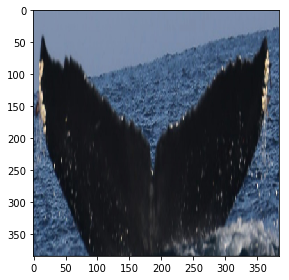

In [26]:
io.imshow(img)

In [27]:
img = io.imread(fnmPs)

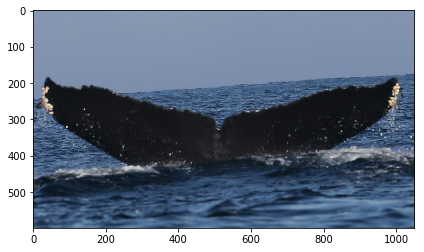

In [28]:
io.imshow(img)

In [33]:
'epoch {:03d}'.format(1+1)

'epoch 002'

In [34]:
'loss avg {:03.3f}'.format(1.2547)

'loss avg 1.255'